# App code for the water-consumption model

This notebook explores Python code for more than just testing our water-consumption Visual Recognition model.  This notebook prototypes code for processing webcam images and sending them to the Visual Recognition model.  Prototyping code here can make creating a web app later easier.

- Step 1: Install and import required libraries
- Step 2: Download sample webcam images
- Step 3: Crop and resize images
- Step 4: Classify the cropped and resized images


## Step 1: Install and import required libraries

- [wget](https://pypi.org/project/wget/) for downloading sample webcam images to the notebook working directory
- [Pillow](https://pillow.readthedocs.io/en/5.3.x/reference/Image.html) for cropping and resizing the webcam imgages
- watson_developer_cloud for working with [Watson Visual Recognition API](https://www.ibm.com/watson/developercloud/visual-recognition/api/v3/python.html?python)

In [ ]:
!pip install --upgrade wget

In [ ]:
!pip install --upgrade watson-developer-cloud

In [3]:
import wget
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re
from PIL import Image
from watson_developer_cloud import VisualRecognitionV3
import json

## Step 2: Download sample webcam images
To work with sample webcam images, use wget to download the images directly from GitHub to the notebook working directory.

In [4]:
!rm -f *.JPG
!rm -f *.jpg

filenames = [
'image1.JPG',
'image2.JPG',
'image3.JPG',
'image4.JPG'
]

url_base = 'https://github.com/IBMDataScience/Watson-Studio-Examples/raw/master/Smart-farm/smart-farm-web-app/code/static/'

for i in range(4):
    wget.download( url_base + filenames[i] )

!ls -l

total 6796
-rw-r----- 1 dsxuser dsxuser 1922753 Mar 22 16:02 image1.JPG
-rw-r----- 1 dsxuser dsxuser 1917760 Mar 22 16:02 image2.JPG
-rw-r----- 1 dsxuser dsxuser 1563866 Mar 22 16:02 image3.JPG
-rw-r----- 1 dsxuser dsxuser 1545453 Mar 22 16:02 image4.JPG


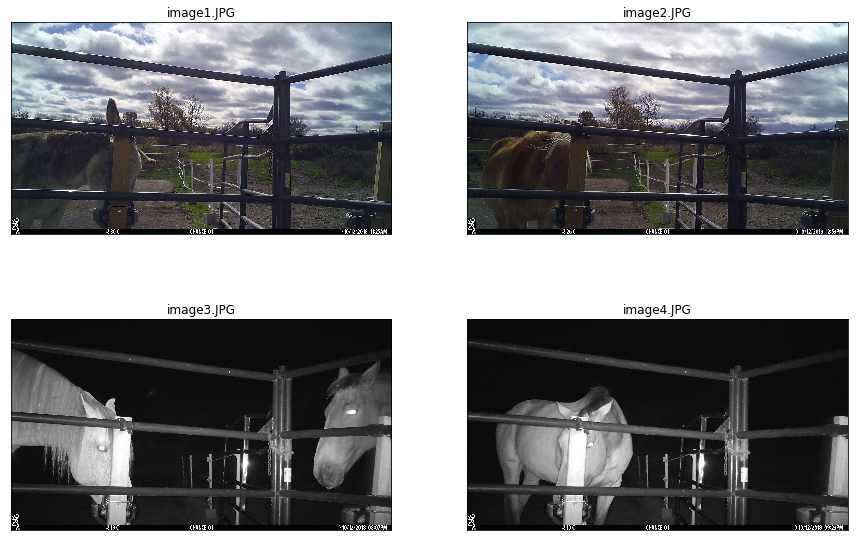

In [5]:
# View the sample webcam images
#
fig, axs = plt.subplots( 2, 2, figsize=( 15, 10 ) )
i = 0
for axis in axs:
    for img in axis:
        img.imshow( mpimg.imread( filenames[i] ) )
        img.set_title( filenames[i] )
        img.set_xticks([])
        img.set_yticks([])
        i = i + 1

## Step 3: Crop and resize the images

In [6]:
def saveSmallImage( filename ):
    full_im     = Image.open( filename )
    cropped_im  = full_im.crop( [50, 50, 1450, 1450 ] )
    small_im    = cropped_im.resize( [ 224, 224 ], resample=Image.LANCZOS )
    sm_filename = re.sub( '\.JPG', '', filename ) + '_sm.jpg'
    small_im.save( sm_filename, format="JPEG" )

In [7]:
for i in range(4):
    saveSmallImage( filenames[i] )

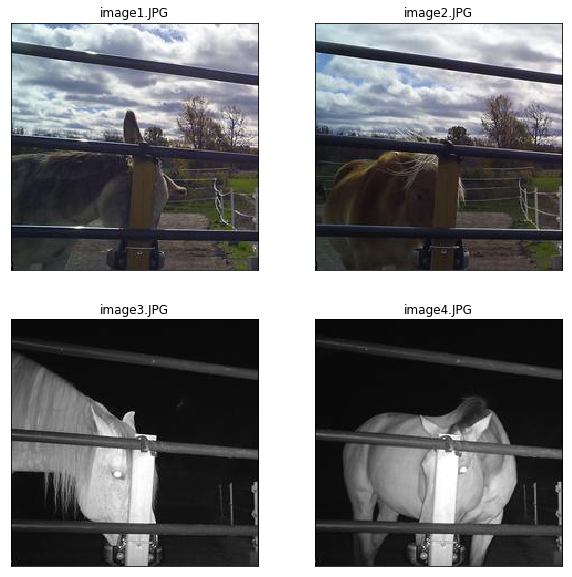

In [8]:
fig, axs = plt.subplots( 2, 2, figsize=( 10, 10 ) )
i = 0
for axis in axs:
    for img in axis:
        img.imshow( mpimg.imread( re.sub( '\.JPG', '', filenames[i] ) + '_sm.jpg' ) )
        img.set_title( filenames[i] )
        img.set_xticks([])
        img.set_yticks([])
        i = i + 1

## Step 4: Classify the cropped and resized images

Use the [Watson Visual Recognition Python client API](https://www.ibm.com/watson/developercloud/visual-recognition/api/v3/python.html?python) to send the cropped and resized images to our trained model for classification.

### Prerequisite
Look up the apikey for the Visual Recognition service instance and the ID of the custom model:
1. From the **Services** menu in Watson Studio (top of the screen) right-click "Watson Services" and then open the link in a new browser tab
2. In the new Watson services tab, click the service instance in the Visual Recognition list
3. In the **Overview** tab, scroll down to the list of your custom models and then click "Copy model ID"
4. In the **Credentials** tab, expand credentials and then copy the apikey

In [9]:
model_id = '' # <-- PASTE YOUR MODEL ID HERE
apikey   = '' # <-- PASTE YOUR APIKEY HERE

In [10]:
def getKey( item ):
    return item["score"]

def getTopClass( results ):
    results_classes = results["images"][0]["classifiers"][0]["classes"]
    sorted_results_classes = sorted( results_classes, key=getKey, reverse=True )
    return sorted_results_classes[0]

def identifyAnimal( filename ):
    visual_recognition = VisualRecognitionV3( version='2018-03-19', iam_apikey=apikey )
    with open( filename, 'rb' ) as image_file:
        results = visual_recognition.classify( image_file, threshold='0', classifier_ids=model_id ).get_result()
        top_class = getTopClass( results )
        return { 'top_class' : top_class, 'results' : results }

In [11]:
filename = filenames[3]
results = identifyAnimal( filename )
print( filename )
print( json.dumps( results, indent=3 ) )

image4.JPG
{
   "top_class": {
      "score": 0.857,
      "class": "shortynight"
   },
   "results": {
      "images": [
         {
            "classifiers": [
               {
                  "classifier_id": "smartxfarm_1190107671",
                  "classes": [
                     {
                        "score": 0.003,
                        "class": "belloday"
                     },
                     {
                        "score": 0.246,
                        "class": "bellonight"
                     },
                     {
                        "score": 0,
                        "class": "donkeyday"
                     },
                     {
                        "score": 0.008,
                        "class": "donkeynight"
                     },
                     {
                        "score": 0.002,
                        "class": "ponyday"
                     },
                     {
                        "score": 0.043,
           

Copyright © 2018 IBM. This notebook and its source code are released under the terms of the MIT License.